In [37]:
# import libraries
import scipy.stats as stats
from statsmodels.stats import weightstats
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.seed(42)  # for producibility 

In [38]:
# import location and price df
df_location_price = pd.read_pickle('data/yelp_price_location.pkl')

In [3]:
df_location_price.head()

,categories,price,rating,review_count,Lat,Lon,state
0,Salad|Seafood|American (Traditional),2,3.5,372,38.997397,-77.026797,MD
1,Pizza|American (New)|Salad,2,3.5,192,38.919506,-77.224311,VA
2,Breakfast & Brunch|American (Traditional)|Burgers,2,2.5,125,39.014190,-76.928270,MD
3,Seafood,1,4.0,13,38.854145,-76.897896,MD
4,Donuts|Coffee & Tea|Breakfast & Brunch,1,4.5,2,38.790540,-77.076455,VA


In [42]:
# look at review count and rating vs price first split into 3 groups
# DC, VA, MD
DC = df_location_price[df_location_price.state == 'DC'][[
    'state', 'price', 'rating','review_count']].reset_index()
MD = df_location_price[df_location_price.state == 'MD'][[
    'state', 'price', 'rating','review_count']].reset_index()
VA = df_location_price[df_location_price.state == 'VA'][[
    'state', 'price', 'rating','review_count']].reset_index()

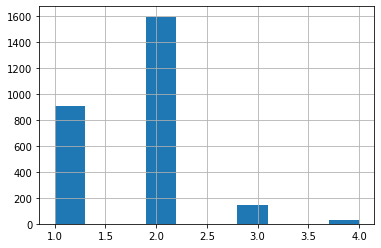

In [54]:
DC.price.hist()

In [ ]:
MD.price.hist()

In [ ]:
VA.price.hist()

In [ ]:
df_location_price.price.hist()

In [5]:
# check for normality for review count and rating 
stats.normaltest(df_location_price.review_count) # not normal distribution 

NormaltestResult(statistic=12410.548241410483, pvalue=0.0)

In [6]:
stats.normaltest(df_location_price.rating) # not normal distribution 

NormaltestResult(statistic=391.5581540679273, pvalue=9.423824117901497e-86)

In [ ]:
# we will use central limit thereom 
# and look at rating mean and review count mean for each price tag

In [7]:
# randomly generate 100 samples for 100000 times 
def boostrap_sample(samples, n):
    return np.random.choice(samples, size = n, replace = True )

In [8]:
# generate sample means
def sampling(samples, n, num):
    sample_means = []
    for i in range(num):
        sample_means.append(boostrap_sample(samples, n).mean())
    return sample_means

In [9]:
# generate 2 samples function for split value 
def samples(df, colname, criteria, value):
    '''
    df: a dataframe
    colname: colname of interest for split 
    criteria: an int for filter for colname
    value: colname for actual comparsion 
    return 2 samples of 1 day numpy array, data1 uses mask, data2 complement mask
    '''
    mask = df[colname]>= criteria
    data1 = df[mask].reset_index()[value]
    data2 = df[~mask].reset_index()[value]
    return (data1, data2)

In [11]:
# split into 2 datasets for pricelow and high 
price_splits_review = samples(df_location_price, 'price', 2, 'review_count')
price_high_review = price_splits_review[0]
price_low_review = price_splits_review[1]

In [50]:
high_means_review = sampling(price_high_review,400,100000)

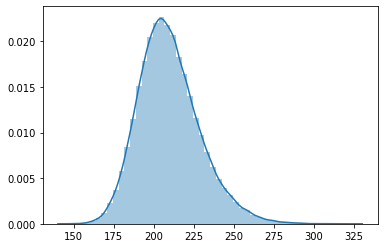

In [51]:
sns.distplot(high_means_review)

In [52]:
low_means_review = np.array(sampling(price_low_review, 400, 100000))

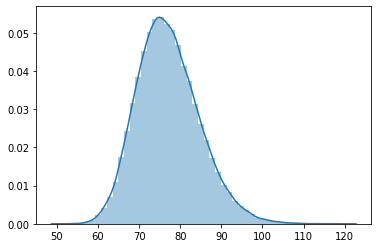

In [53]:
sns.distplot(low_means_review)

In [55]:
stats.ttest_ind(high_means_review, low_means_review, equal_var=False)
# high price restaurant has higher review counts 

Ttest_indResult(statistic=2035.3860454467292, pvalue=0.0)

In [17]:
# split using rating 
price_splits_rating = samples(df_location_price, 'price', 2, 'rating')
price_high_rating = price_splits_rating[0]
price_low_rating = price_splits_rating[1]

In [18]:
high_means_rating = sampling(price_high_rating,100,100000)
low_means_rating = sampling(price_low_rating,100,1000000)

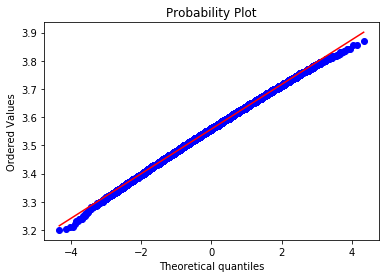

In [23]:
stats.probplot(high_means_rating, dist="norm", plot=plt)
plt.show()

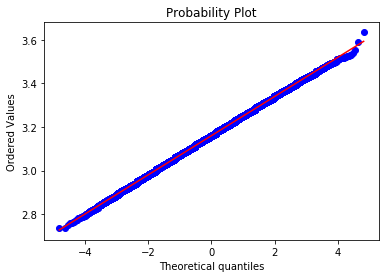

In [24]:
stats.probplot(low_means_rating, dist="norm", plot=plt)
plt.show()

In [19]:
stats.ttest_ind(high_means_rating, low_means_rating, equal_var=False)
# high price restaurant has higher rating 

Ttest_indResult(statistic=1498.0130061442567, pvalue=0.0)